# 3. Convolutional neural networks

Convolutional neural networks are a special kind of NNs especially suited for image processing and pattern recognition. In this document, we are going to study their main characteristics and the basic issues related to their use in solving image processing tasks.

## Classification problem: CIFAR-10 data

As an example, we are going to use a popular simple dataset CIFAR-10, which contains small-sized color images with labels to ten mutually exclusive classes, see [https://www.cs.toronto.edu/~kriz/cifar.html](https://www.cs.toronto.edu/~kriz/cifar.html). An easy way to get access to the raw data in jpeg form is by cloning a repository: open a terminal and run

`git clone https://github.com/YoongiKim/CIFAR-10-images.git`

The images now appear in a folder "CIFAR-10-images", which has two subfolders: "train" and "test", each containing 10 additional folders for images in each of the different classes. 

In order to access the image files, and appropriately preprocess their contents so that they can be fed into neural networks, Keras provides a utility function `image_dataset_from_directory`. This converts jpeg files on disk to a Dataset object, which generates batches of arrays suitable for training the network. 

For this purpose, we set up three such datasets: one for training samples, one for validation samples, and one for the samples in the test set. In order to avoid changing the folder structure, both the training and validation datasets are extracted from the same ("train") directory, using the `validation_split` parameter. 
 

In [1]:
import keras

batch_size = 32 # number of images in each batch
img_size = (32, 32) # 32 x 32 pixel images in input data

train_dataset, validation_dataset = keras.utils.image_dataset_from_directory(
    '../../CIFAR-10-images/train',
    batch_size=batch_size, 
    image_size=img_size,
    label_mode='categorical',
    validation_split=0.2, 
    subset='both',
    seed=123)

test_dataset = keras.utils.image_dataset_from_directory(
    '../../CIFAR-10-images/test',
    batch_size=batch_size, 
    image_size=img_size,
    label_mode='categorical')

Found 50000 files belonging to 10 classes.
Using 40000 files for training.
Using 10000 files for validation.
Found 10000 files belonging to 10 classes.


In the following cell, a simple convolutional neural network model is built and compiled. The details behind the new kinds of layers are discussed a little bit later below. At this point, note only that the Input layer (defining the shape of the input arrays) is followed by a Rescaling layer that rescales the pixel values (originally in the range 0 ... 255) to the range 0 ... 1.

In [2]:
from keras import Sequential
from keras import layers

model = Sequential([ 
    layers.Input(shape=(32, 32, 3)),
    layers.Rescaling(scale=1./255),
    layers.Conv2D(32, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Flatten(), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(10, activation='softmax') ]) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

We now train our model for 10 epochs. Note that Keras `fit` method accepts datasets for training. 

In [3]:
history = model.fit(
    train_dataset, 
    validation_data=validation_dataset,    
    epochs=10, 
    verbose=1)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.3506 - loss: 1.7735 - val_accuracy: 0.5326 - val_loss: 1.3269
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5583 - loss: 1.2428 - val_accuracy: 0.5924 - val_loss: 1.1547
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6157 - loss: 1.1056 - val_accuracy: 0.6119 - val_loss: 1.1073
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6437 - loss: 1.0213 - val_accuracy: 0.6293 - val_loss: 1.0631
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6705 - loss: 0.9564 - val_accuracy: 0.6405 - val_loss: 1.0240
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.6885 - loss: 0.8984 - val_accuracy: 0.6437 - val_loss: 1.0251
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.7057 - loss: 0.8439 - val_accuracy: 0.6458 - val_loss: 1.0357
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7174 -

Let us next check out how the accuracy and loss values have changed during training:

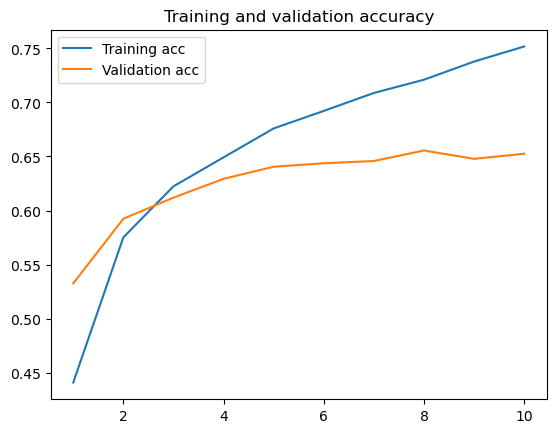

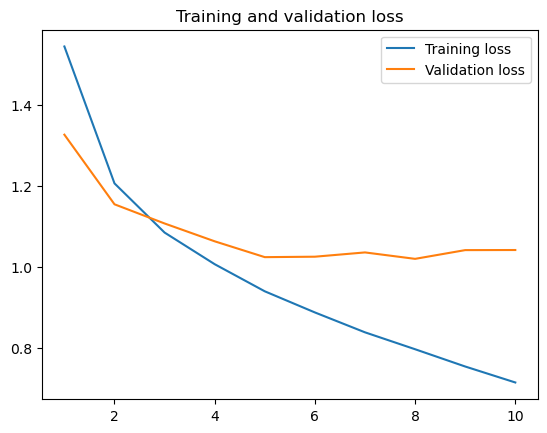

In [4]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()        

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The training curves show signs of overfitting; we shall discuss this issue later below.

## Structure of a convolutional NN model

Next we shall investigate the structure of our neural network in detail. Schematically, the model is presented in the figure below:

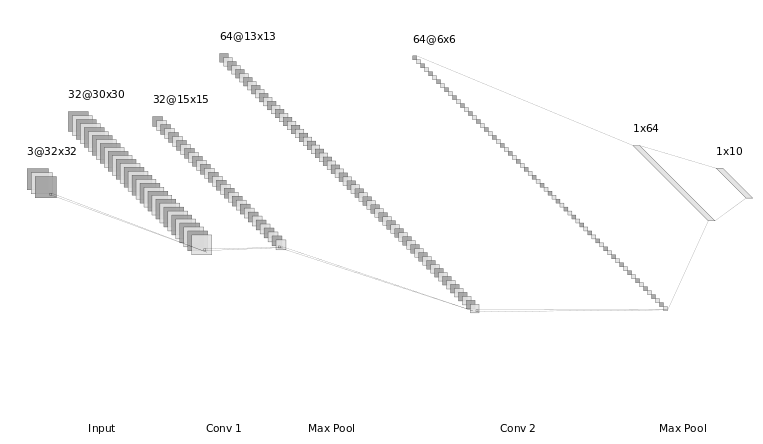

In [5]:
from IPython.display import Image,display;display(Image(filename="Images/cnn.png"))

The **input layer** of the model is defined by the pixel values of the individual images, organized in three-dimensional arrays of shape (width, height, depth). The width and height dimensions indicate the position of the pixel within the image plane, and the depth dimension indicates the number of color channels: it is either 1 (black/white images) or 3 (color images). In the CIFAR-10 dataset the input samples have shape (32, 32, 3), so they consist of color images with 32 x 32 pixels. 

The **convolutional layers**, `Conv2D` in Keras, take such 3D arrays as inputs, and process them into new 3D arrays. Unlike the units in fully connected (`Dense`) layers, the units in Conv2D layers, or **filters**, are not connected to all the units in the previous layer, but only to a tiny subset of units contained within a small **window**; typical window sizes are 3 x 3 or 5 x 5. The number of filters and the window size of the filters in a Conv2D layer are specified by the parameters given to the layer: the first Conv2D layer in our example model has 32 filters, each with 3 x 3 window size. 

Each filter in a Conv2D layer has its individual set of trainable parameters: a number of weights and one bias parameter. The number of weights is determined by the window size and the depth of the 3D input array processed by the layer. The first convolutional layer in the example model has 3 x 3 window size, and depth 3 (three color channels), so each filter has 3$\cdot$3$\cdot$3 = 27 weights and one bias value, and the entire layer has 32$\cdot$28 = 896 trainable parameters.

The computation performed by a single filter in a Conv2D layer begins with the filter situated in the upper left-hand corner of the image plane. At this location, a weighted sum over the pixel values in the 3 x 3 window in all the three color channels is calculated, using the weights and bias values of the filter. The weighted sum is then inserted into the activation function (ReLU in our example), and the output then defines the upper left-hand pixel value in the new array. The window then slides one pixel to the right to a new location, repeating the same computational procedure. In this manner, the entire image plane is traversed, and a new set of 2D (width and height) numerical values are obtained; this is what is meant by the term *convolution*. Note that the convolution reduces the original width and height dimensions of the input data by two, because there are only 30 x 30 possible locations to place a 3 x 3 window on the original 32 x 32 plane.  

Every one of the 32 filters in the layer performs a similar computation (weighted sum + activation), resulting in 32 different processed (filtered) views of the original image. This information is then arranged in a new three-dimensional array of shape (30, 30, 32), where the depth dimension is now determined by the number of filters in the layer. The new array then enters the next layer in the model as an input. 

The convolutional layers have a number of useful features that make them especially suited for image processing. Instead of processing the entire image as a whole, they focus on small areas at a time; this not only reduces the computational burden, but also allows for searching and recognizing certain patterns anywhere in the image. This is why convolutional nets (CNNs for short) are much more efficient in finding patterns than fully connected NNs. 

The next layer is a **max pooling** layer, which reduces the width and height dimensions of the array. It slides a window of size 2 x 2 over the image plane in a similar manner than convolution does, but only retains the *largest* value in each such window; accordingly, both width and height dimensions are reduced by a factor of two. Max pooling then transforms the input array of shape (30, 30, 32) to (15, 15, 32); note that the depth dimension is unaffected by this operation.  

Because pooling obviously throws away information, it could (mistakenly) be thought as harmful. However, reducing the width and height of the image effectively produces a zoomed-in version of the image. This enables the subsequent convolutional layers to find patterns of larger size in the image, allowing the network to learn to recognize features of different spatial hierarchies. For example, the first layers of a face-recognizing CNN might learn to find small features (vertical or horizontal lines, curves etc.), the next ones slightly larger features (eyes, ears, noses), and the final ones entire faces.

Typical CNN architectures consist of repeated Conv2D and Max Pooling layer pairs, one after another. In our classifier model, there are two such pairs, which process the original data array of shape (32, 32, 3) to one of shape (6, 6, 64). At this stage, the 3D array is flattened to a 1D array with 6$\cdot$6$\cdot$64 = 2304 elements. The remaining part of the model then is a fully connected one with a single hidden layer of 64 neurons, followed by the output layer. In accordance with our multiclass classification problem, the final output layer has 10 units and softmax activation. 

## Convnets and overfitting

Now that we understand the computations that a CNN model performs, we can return to the issue of overfitting. We have already discussed some regularization techniques in the context of fully connected networks, such as L2 regularization and dropout. These methods are available in our current situation as well, but e.g. dropout is usually best to apply in the fully connected classifier part of the model, not between Conv2D layers. This is because dropout tends to disrupt the learning of useful filters, and the CNN filters only have a fairly small number of parameters to start with.

However, in the context of image processing and convolutional neural networks, there exists a special method of regularization, which is extremely commonly used. This is the method referred to as **data augmentation**.

Generally speaking, overfitting is caused by having too few training samples: there is not enough variation in the data to build a model that is able to generalize and succeed with new, previously unseen data. Data augmentation aims to help in this respect by artificially generating more data by modifying existing data. Before inserting the image samples in the training set into the model during training, they are subjected to small random transformations; the resulting changes should be small enough to not render the contents of the image unrecognizable, but still add diversity to the training data seen by the model. 

To implement data augmentation, we first define a function for preprocessing the datasets (including also the rescaling, which can then be omitted from the model):

In [6]:
from tensorflow import data as tf_data

data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]

def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

# Apply `data_augmentation` to the training images.
train_dataset = train_dataset.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_dataset = train_dataset.prefetch(tf_data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(tf_data.AUTOTUNE)



Let us build and train our model again (note the added Dropout layer after the Flatten layer):

In [7]:
model = Sequential([ 
    layers.Input(shape=(32, 32, 3)),
    layers.Rescaling(scale=1./255),
    layers.Conv2D(32, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'), 
    layers.Dense(10, activation='softmax') ]) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_dataset, 
    validation_data=validation_dataset,    
    epochs=15, 
    verbose=1)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.3257 - loss: 1.8365 - val_accuracy: 0.5036 - val_loss: 1.4086
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.4949 - loss: 1.4129 - val_accuracy: 0.5640 - val_loss: 1.2526
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.5363 - loss: 1.3090 - val_accuracy: 0.5852 - val_loss: 1.1832
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.5597 - loss: 1.2421 - val_accuracy: 0.6123 - val_loss: 1.1235
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.5759 - loss: 1.1930 - val_accuracy: 0.6074 - val_loss: 1.1157
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.5877 - loss: 1.1686 - val_accuracy: 0.5969 - val_loss: 1.1750
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.5954 - loss: 1.1386 - val_accuracy: 0.6369 - val_loss: 1.0472
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6064 -

This time there is much less overfitting to be observed in the training graphs:

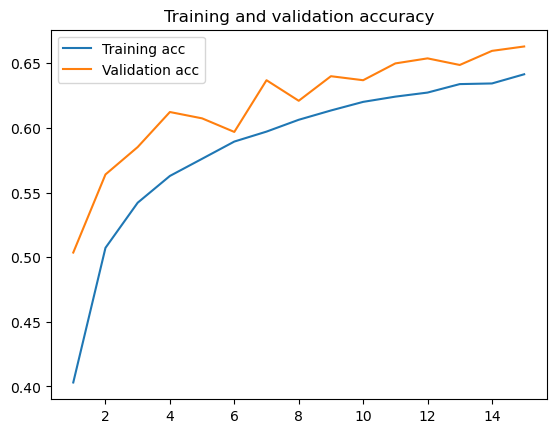

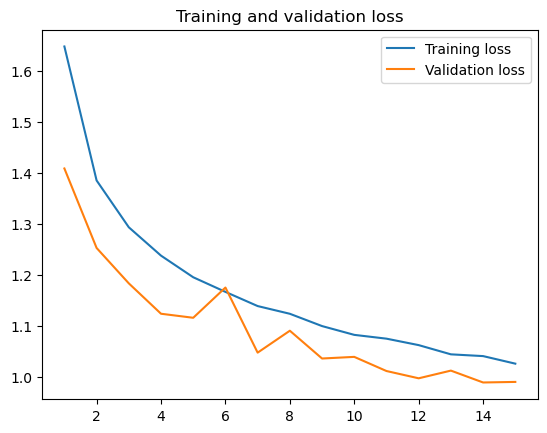

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()        

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Accuracy with the test set is not impressive, but training is obviously terminated too early.

In [9]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6594 - loss: 0.9827
Test accuracy: 0.6552
